In [1]:
import pandas as pd
import numpy as np
import os
import sys
import missingno as msno
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import censusdata as cd
# predict the presence of smoke alarms

In [4]:
input_loc = '../data/Master Project Data/'
output_loc = '../data/processed/'

In [5]:
df = pd.read_csv('C:\\Users\\Ian\\FlatironDS\\datakind\\red_cross\\Data\\ARC\\ARC Preparedness Data.csv',
                   dtype = {'GEOID': str, 'Zip': str})

In [6]:
acs = pd.read_csv(input_loc + 'ACS 5YR Block Block Data.csv')

In [7]:
df.head()

,GEOID,Census Block Group Y,Census Block Group X,City,State,Zip,County,In-Home Visit Date,Smoke Alarms Installed (9-Volt/10-Year/DHH),10-Year and 9-Volt Alarms Installed,...,Batteries Replaced,Fire Escape Plans Made,Fire Safety Checklists Completed,Additional Hazard Education Conducted,Additional Hazard Type,People Served,Youth Served,Seniors Served,"Veterans, Military Members and Military Family Members Served","Individuals with Disabilities, Access, or Functional Needs Served"
0,#_010010201001,32.465832,-86.489661,PRATTVILLE,AL,36067,Autauga,2/27/2016,1,1,...,0,1,1,1,Tornadoes,2,0,0,0,0
1,#_010010201002,32.485867,-86.489671,PRATTVILLE,AL,36067,Autauga,1/16/2015,1,1,...,0,1,0,0,None,1,0,0,0,0
2,#_010010203001,32.480175,-86.460793,PRATTVILLE,AL,36067,Autauga,2/27/2016,1,1,...,0,1,1,1,Hurricanes,5,0,0,0,0
3,#_010010203002,32.464309,-86.458472,PRATTVILLE,AL,36067,Autauga,9/26/2015,1,1,...,0,1,1,0,None,5,0,0,0,0
4,#_010010204002,32.470417,-86.435966,PRATTVILLE,AL,36066,Autauga,11/1/2015,2,2,...,2,1,1,0,None,2,0,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862057 entries, 0 to 862056
Data columns (total 23 columns):
 #   Column                                                             Non-Null Count   Dtype  
---  ------                                                             --------------   -----  
 0   GEOID                                                              862057 non-null  object 
 1   Census Block Group Y                                               862057 non-null  float64
 2   Census Block Group X                                               862057 non-null  float64
 3   City                                                               862057 non-null  object 
 4   State                                                              862057 non-null  object 
 5   Zip                                                                862057 non-null  object 
 6   County                                                             862057 non-null  object 
 7   In-Home Vis

Clean up titles and datetime dates

In [9]:
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('-', '_')
df.columns = df.columns.str.replace('/', '_')
df.columns = df.columns.str.replace('(', '_')
df.columns = df.columns.str.replace(')', '_')
df.columns

Index(['geoid', 'census_block_group_y', 'census_block_group_x', 'city',
       'state', 'zip', 'county', 'in_home_visit_date',
       'smoke_alarms_installed__9_volt_10_year_dhh_',
       '10_year_and_9_volt_alarms_installed', 'dhh_alarms_installed',
       'pre_existing_alarms', 'pre_existing_alarms_tested_and_working',
       'batteries_replaced', 'fire_escape_plans_made',
       'fire_safety_checklists_completed',
       'additional_hazard_education_conducted', 'additional_hazard_type',
       'people_served', 'youth_served', 'seniors_served',
       'veterans,_military_members_and_military_family_members_served',
       'individuals_with_disabilities,_access,_or_functional_needs_served'],
      dtype='object')

In [10]:
df.in_home_visit_date = pd.to_datetime(df.in_home_visit_date)

In [11]:
# check for crazy values
df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
geoid,862057,106555,#_360050462013,1968,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
census_block_group_y,862057,NaN,NaN,NaN,NaT,NaT,37.798,4.97133,18.9889,34.1458,38.7919,40.9559,70.2628
census_block_group_x,862057,NaN,NaN,NaN,NaT,NaT,-89.2233,14.9033,-166.35,-94.5378,-84.585,-79.9007,-67.4165
city,862057,12341,BROOKLYN,12935,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,862057,51,NY,75139,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip,862057,20098,10475,7619,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
county,862057,1662,Jefferson,20167,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_home_visit_date,862057,2070,2018-04-28 00:00:00,14387,2014-06-02,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoke_alarms_installed__9_volt_10_year_dhh_,862057,NaN,NaN,NaN,NaT,NaT,2.43245,1.49865,0,1,2,3,14
10_year_and_9_volt_alarms_installed,862057,NaN,NaN,NaN,NaT,NaT,2.41655,1.49195,0,1,2,3,14


No crazy values. It looks like the numeric ones of interest are from 8 onward in the info table. Let's group those together.

In [12]:
numeric_columns = list(df.columns)[8:]
numeric_columns

['smoke_alarms_installed__9_volt_10_year_dhh_',
 '10_year_and_9_volt_alarms_installed',
 'dhh_alarms_installed',
 'pre_existing_alarms',
 'pre_existing_alarms_tested_and_working',
 'batteries_replaced',
 'fire_escape_plans_made',
 'fire_safety_checklists_completed',
 'additional_hazard_education_conducted',
 'additional_hazard_type',
 'people_served',
 'youth_served',
 'seniors_served',
 'veterans,_military_members_and_military_family_members_served',
 'individuals_with_disabilities,_access,_or_functional_needs_served']

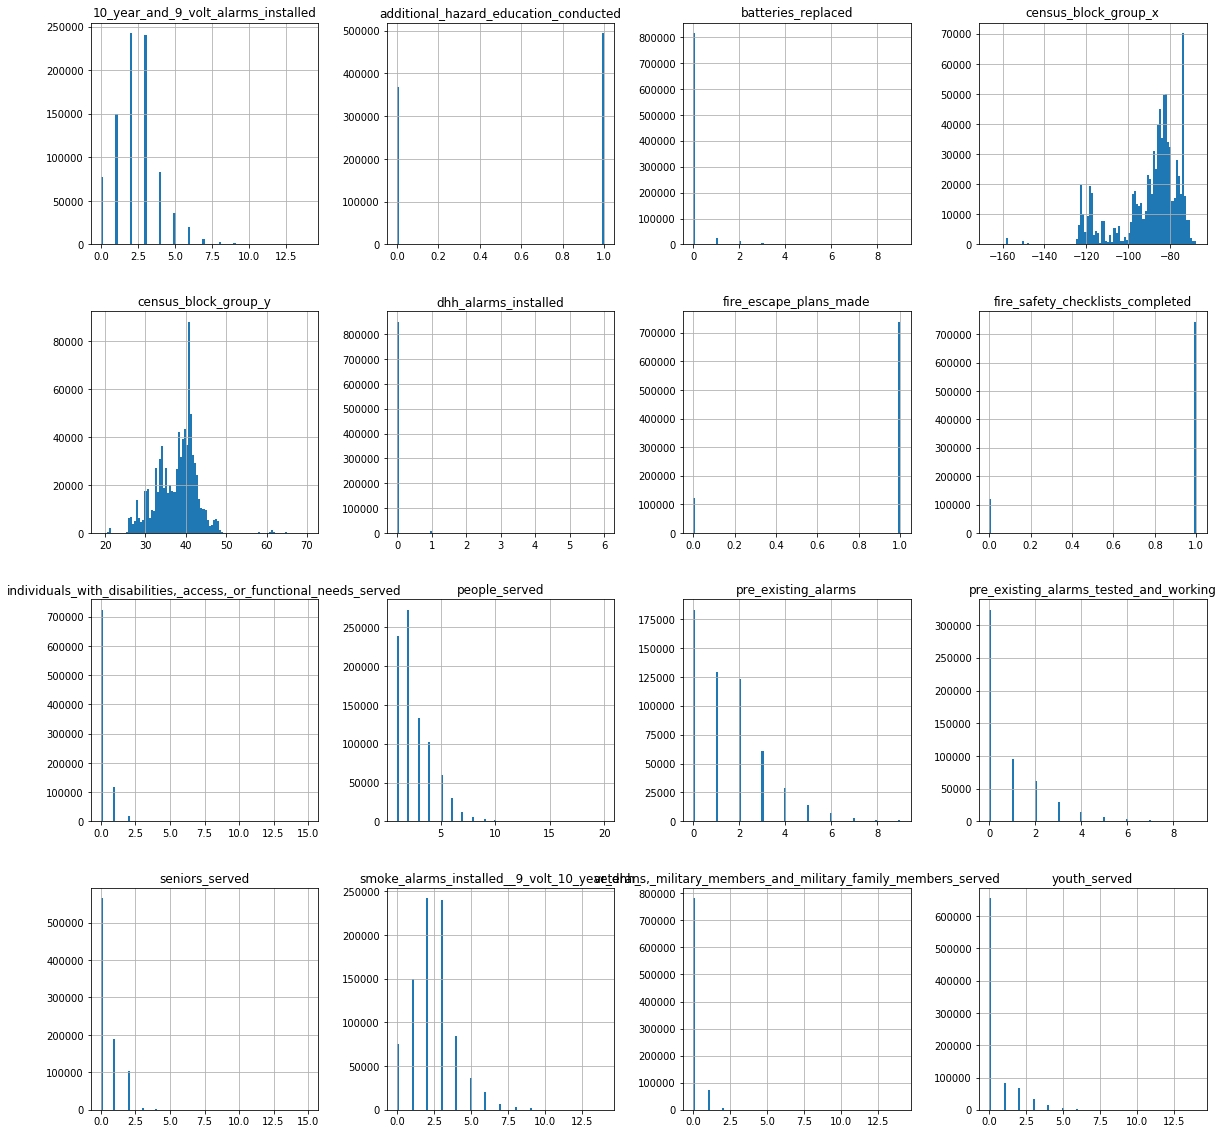

In [13]:
df.hist(figsize=(20,20), bins=100);

It looks like our outcome variables, pre_existing_alarms_tested_and_working, is missing a lot of data.

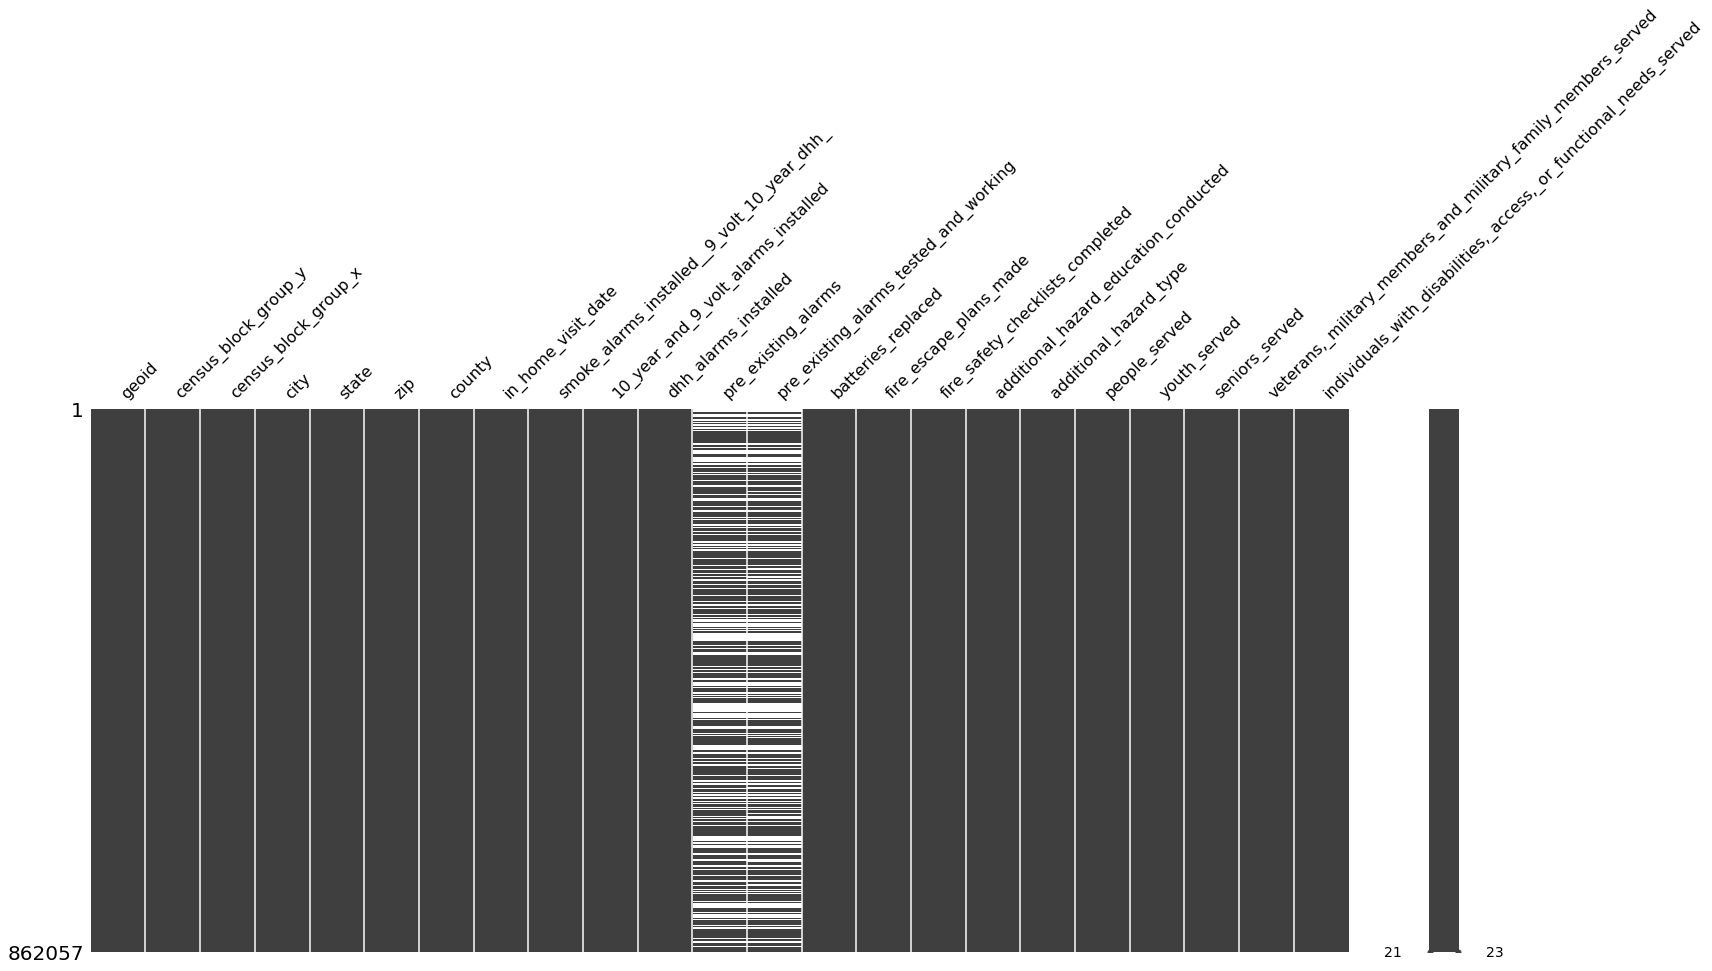

In [19]:
msno.matrix(df);

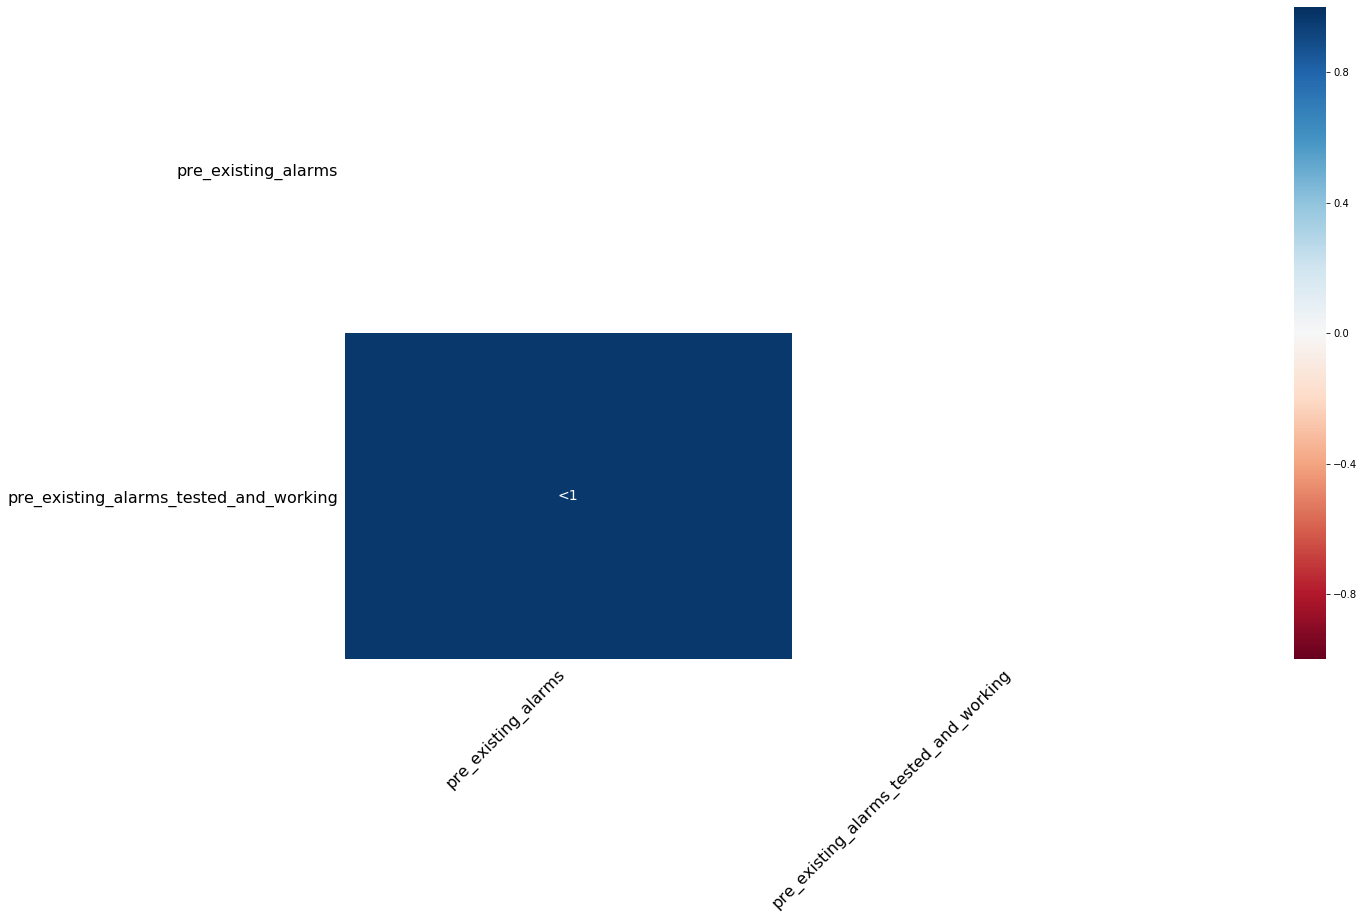

In [20]:
msno.heatmap(df);

In [21]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [22]:
missing_value_df

,column_name,percent_missing
geoid,geoid,0.000000
census_block_group_y,census_block_group_y,0.000000
census_block_group_x,census_block_group_x,0.000000
city,city,0.000000
state,state,0.000000
zip,zip,0.000000
county,county,0.000000
in_home_visit_date,in_home_visit_date,0.000000
smoke_alarms_installed__9_volt_10_year_dhh_,smoke_alarms_installed__9_volt_10_year_dhh_,0.000000
10_year_and_9_volt_alarms_installed,10_year_and_9_volt_alarms_installed,0.000000


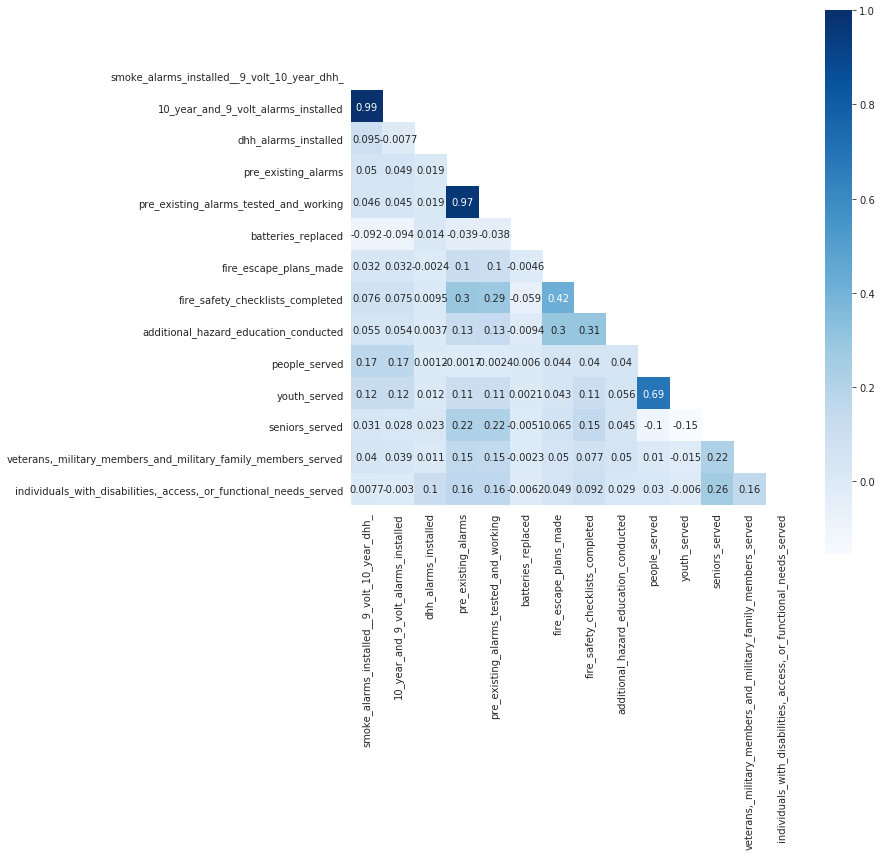

In [25]:
# check to see if there's any clear correlation between existing and missing variables (MNAR, MAR, MCAR)
filled = df[numeric_columns].fillna(-999)
corr_matrix = filled.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    p2 = sns.heatmap(corr_matrix, annot=True, mask=mask, square=True, cmap="Blues")
plt.show()

In [24]:
del filled

Looks like fire safety might checklist completion is correlated with missing target variable

### Temporal Distribution

In [108]:
df.in_home_visit_date.describe()

count                  862057
unique                   2070
top       2018-04-28 00:00:00
freq                    14387
first     2014-06-02 00:00:00
last      2020-02-29 00:00:00
Name: in_home_visit_date, dtype: object

In [109]:
df.groupby(df.in_home_visit_date.map(lambda x: x.year)).geoid.agg('count').sort_values(ascending=False)

in_home_visit_date
2019    192388
2018    181949
2016    175288
2017    175094
2015    101972
2020     20389
2014     14977
Name: geoid, dtype: int64

In [110]:
df.groupby([df.in_home_visit_date.dt.year.rename('year'), df.in_home_visit_date.dt.month.rename('month')]).geoid.agg({'count'}).T

year  2014                                  2015              ...   2019  \
month   6   7    8    9     10    11    12    1     2     3   ...     5    
count   96  73  152  265  5957  5036  3398  6095  4290  6763  ...  36690   

year                                                    2020        
month     6      7      8      9      10     11    12     1     2   
count  16741  10097  10508  12291  16541  15898  9851  12294  8095  

[1 rows x 69 columns]

### Geographic Distribution

In [111]:
df.groupby([df.state
            , df.city
            , df.geoid
           ]).zip.agg({'count'}).sort_values(by=['count'], ascending=False)[0:20]

count
state city                geoid                
NY    THE BRONX           #_360050462013   1773
                          #_360050302005   1239
                          #_360050462014    799
                          #_360050302006    751
NJ    NEWARK              #_340130003002    696
NY    THE BRONX           #_360050462019    598
NJ    WASHINGTON TOWNSHIP #_340155012092    547
NY    STATEN ISLAND       #_360850319011    543
FL    ZELLWOOD            #_120950179023    526
CA    SAN MARCOS          #_060730200191    495
NY    NEW YORK            #_360610174011    478
NJ    NEWARK              #_340130048023    446
NY    BROOKLYN            #_360470449002    407
NJ    EATONTOWN           #_340258050011    382
      NEWARK              #_340130002001    360
NY    BROOKLYN            #_360470179001    356
      SOMERS              #_361190149092    351
FL    SEBRING             #_120559606025    347
AZ    YUMA                #_040270111062    320
NY    STATEN ISLAND       #_360850007001    319

In [112]:
# drop weird values
df = df.loc[df.geoid !="#_NA"]

In [113]:
df.geoid.value_counts()

#_360050462013    1968
#_360050302005    1323
#_360050462014     815
#_360050302006     752
#_340130003002     697
                  ... 
#_010479571001       1
#_290470209013       1
#_280350008002       1
#_060170308041       1
#_040190047131       1
Name: geoid, Length: 106554, dtype: int64

In [114]:
# %%time
# df_norm_col=(df-df.mean())/df.std()
# corr_matrix = df_norm_col.corr()
# mask = np.zeros_like(corr_matrix)
# mask[np.triu_indices_from(mask)] = True
# plt.figure(figsize=(10,10))
# with sns.axes_style("white"):
#     p2 = sns.heatmap(corr_matrix, mask=mask, square=True, cmap="PiYG")
# plt.show()

### Isolate Years to matchup with Census

In [115]:
# arc_2019 = df.loc[df.in_home_visit_date.dt.year == 2019]
# arc_2019.head()

In [116]:
#load in ACS data
p = Path.cwd()
image_path = str(p.parent) + "\docs\images"
data_path = str(p.parent) + "\data\Master Project Data"
acs_path =  data_path + '\ACS 5YR Block Block Data.csv'


acs = pd.read_csv(acs_path, encoding='latin-1')
acs.columns = [x.lower() for x in list(acs.columns)]

In [119]:
df_copy = df.copy()

In [120]:
df_copy.geoid = df_copy.geoid.map(lambda x: x[2:])

In [122]:
df_copy.to_csv(output_loc + 'arc_data.csv')

In [66]:
acs.head()

,geoid,name,county_name,state_name,tot_population,in_poverty,inc_pct_poverty,inc_pcincome,age_pct_under25,age_pct_25_64,...,house_val_175k_200k,house_val_200k_250k,house_val_250k_300k,house_val_300k_400k,house_val_400k_500k,house_val_500k_750k,house_val_750k_1m,house_val_1m_1.5m,house_val_1.5m_2m,house_val_more_2m
0,#_530019501001,"Block Group 1, Census Tract 9501, Adams County...",Adams County,Washington,842,64,0.076010,28484.0,0.738717,0.494062,...,0.109705,0.084388,0.177215,0.113924,0.0,0.054852,0.000000,0.029536,0.0,0.0
1,#_530019501002,"Block Group 2, Census Tract 9501, Adams County...",Adams County,Washington,922,94,0.101952,29939.0,0.737219,0.572597,...,0.083077,0.040000,0.027692,0.012308,0.0,0.000000,0.009231,0.000000,0.0,0.0
2,#_530019501003,"Block Group 3, Census Tract 9501, Adams County...",Adams County,Washington,515,99,0.192233,18968.0,0.738832,0.541237,...,0.039735,0.059603,0.026490,0.026490,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,#_530019502001,"Block Group 1, Census Tract 9502, Adams County...",Adams County,Washington,530,65,0.122642,23378.0,0.783019,0.443396,...,0.032258,0.021505,0.016129,0.016129,0.0,0.000000,0.000000,0.000000,0.0,0.0
4,#_530019502002,"Block Group 2, Census Tract 9502, Adams County...",Adams County,Washington,679,158,0.232695,25441.0,0.886598,0.587629,...,0.012658,0.132911,0.031646,0.031646,0.0,0.000000,0.000000,0.000000,0.0,0.0


In [67]:
# acs['house_compare'] = acs.total_housing_units - acs.house_tot_occ_cnt
# acs.house_compare.describe()

In [68]:
# What percentage of blocks are represented in the ARC data?
acs.geoid.isin(df.geoid).mean()

0.48936570848584776

In [70]:
# this should be 1, but it seems like somewhere there's a strange geoid or two
df.geoid.isin(acs.geoid).mean()

1.0

In [71]:
count_arc = df.groupby('geoid')['zip'].count()

In [74]:
merged = pd.merge(acs, df, on="geoid", how="inner")
merged

,geoid,name,county_name,state_name,tot_population,in_poverty,inc_pct_poverty,inc_pcincome,age_pct_under25,age_pct_25_64,...,batteries_replaced,fire_escape_plans_made,fire_safety_checklists_completed,additional_hazard_education_conducted,additional_hazard_type,people_served,youth_served,seniors_served,"veterans,_military_members_and_military_family_members_served","individuals_with_disabilities,_access,_or_functional_needs_served"
0,#_530039603001,"Block Group 1, Census Tract 9603, Asotin Count...",Asotin County,Washington,942,361,0.383227,13435.0,0.902335,0.554140,...,0,1,1,1,Wildfires,1,0,0,0,1
1,#_530039603001,"Block Group 1, Census Tract 9603, Asotin Count...",Asotin County,Washington,942,361,0.383227,13435.0,0.902335,0.554140,...,0,1,1,1,Wildfires,3,1,1,1,1
2,#_530039603002,"Block Group 2, Census Tract 9603, Asotin Count...",Asotin County,Washington,911,141,0.154775,17883.0,1.062569,0.473106,...,2,1,1,1,Other,2,0,1,0,0
3,#_530039603003,"Block Group 3, Census Tract 9603, Asotin Count...",Asotin County,Washington,643,89,0.138414,22080.0,0.738725,0.695179,...,1,1,1,1,Wildfires,1,0,1,0,1
4,#_530039603003,"Block Group 3, Census Tract 9603, Asotin Count...",Asotin County,Washington,643,89,0.138414,22080.0,0.738725,0.695179,...,0,1,1,1,Wildfires,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862049,#_110010104001,"Block Group 1, Census Tract 104, District of C...",District of Columbia,District of Columbia,1530,693,0.452941,18464.0,1.043791,0.461438,...,0,1,1,1,Other,4,1,1,0,1
862050,#_110010106001,"Block Group 1, Census Tract 106, District of C...",District of Columbia,District of Columbia,956,240,0.251046,45807.0,0.721757,0.678870,...,0,1,1,0,None,1,0,0,0,0
862051,#_110010106002,"Block Group 2, Census Tract 106, District of C...",District of Columbia,District of Columbia,5407,517,0.095617,72428.0,0.640281,0.808766,...,0,1,1,0,None,1,0,0,1,0
862052,#_110010106002,"Block Group 2, Census Tract 106, District of C...",District of Columbia,District of Columbia,5407,517,0.095617,72428.0,0.640281,0.808766,...,0,1,1,1,Hurricanes,1,0,0,0,0


In [86]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862054 entries, 0 to 862053
Columns: 138 entries, geoid to individuals_with_disabilities,_access,_or_functional_needs_served
dtypes: datetime64[ns](1), float64(109), int64(19), object(9)
memory usage: 914.2+ MB


In [87]:
merged.to_pickle(output_loc + 'merged.pkl')

In [75]:
merged.shape

(862054, 138)

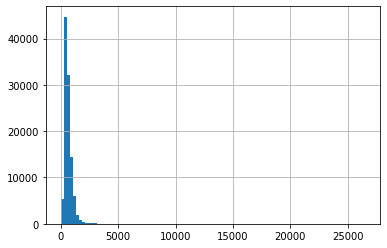

In [46]:
merged.total_housing_units.hist(bins=100)

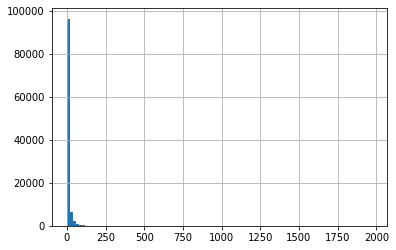

In [44]:
merged.zip.hist(bins=100);

In [41]:
import scipy.stats as stats

In [42]:
scipy.stats.chisquare(merged.zip, f_exp=merged.total_housing_units)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4653: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


Power_divergenceResult(statistic=inf, pvalue=0.0)

In [24]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862054 entries, 0 to 862053
Columns: 138 entries, geoid to house_val_more_2m
dtypes: datetime64[ns](1), float64(109), int64(19), object(9)
memory usage: 914.2+ MB


In [25]:
list(merged.columns)

['geoid',
 'census_block_group_y',
 'census_block_group_x',
 'city',
 'state',
 'zip',
 'county',
 'in_home_visit_date',
 'smoke_alarms_installed__9_volt_10_year_dhh_',
 '10_year_and_9_volt_alarms_installed',
 'dhh_alarms_installed',
 'pre_existing_alarms',
 'pre_existing_alarms_tested_and_working',
 'batteries_replaced',
 'fire_escape_plans_made',
 'fire_safety_checklists_completed',
 'additional_hazard_education_conducted',
 'additional_hazard_type',
 'people_served',
 'youth_served',
 'seniors_served',
 'veterans,_military_members_and_military_family_members_served',
 'individuals_with_disabilities,_access,_or_functional_needs_served',
 'name',
 'county_name',
 'state_name',
 'tot_population',
 'in_poverty',
 'inc_pct_poverty',
 'inc_pcincome',
 'age_pct_under25',
 'age_pct_25_64',
 'age_pct_over65',
 'educ_tot_pop',
 'educ_no_school',
 'educ_nursery_4th',
 'educ_5th_6th',
 'educ_7th_8th',
 'educ_9th',
 'educ_10th',
 'educ_11th',
 'educ_12th_no_diploma',
 'educ_high_school_grad',
 '

### Verify with CensusData importation

In [20]:
!pip install censusdata

  Stored in directory: C:\Users\Ian\AppData\Local\pip\Cache\wheels\e8\9e\f9\8d0b054be9981c6f675630de9f32ce59620f8b515c13542a4c
Successfully built censusdata


In [21]:
import censusdata as cd